<a href="https://colab.research.google.com/github/paka998/Vaagdevi/blob/main/Siri_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Successful_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Encoding categorical data

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
print(X_test)

[[0.0 0.0 1.0 66051.52 182645.56 118148.2]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [0.0 0.0 1.0 101913.08 110594.11 229160.95]
 [0.0 0.0 1.0 27892.92 84710.77 164470.71]
 [0.0 0.0 1.0 153441.51 101145.55 407934.54]
 [1.0 0.0 0.0 72107.6 127864.55 353183.81]
 [1.0 0.0 0.0 20229.59 65947.93 185265.1]
 [1.0 0.0 0.0 61136.38 152701.92 88218.23]
 [0.0 0.0 1.0 73994.56 122782.75 303319.26]
 [0.0 0.0 1.0 142107.34 91391.77 366168.42]]


## Training the Multiple Linear Regression model on the Training set

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [14]:
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [15]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

## Visualize the result to check accuracy

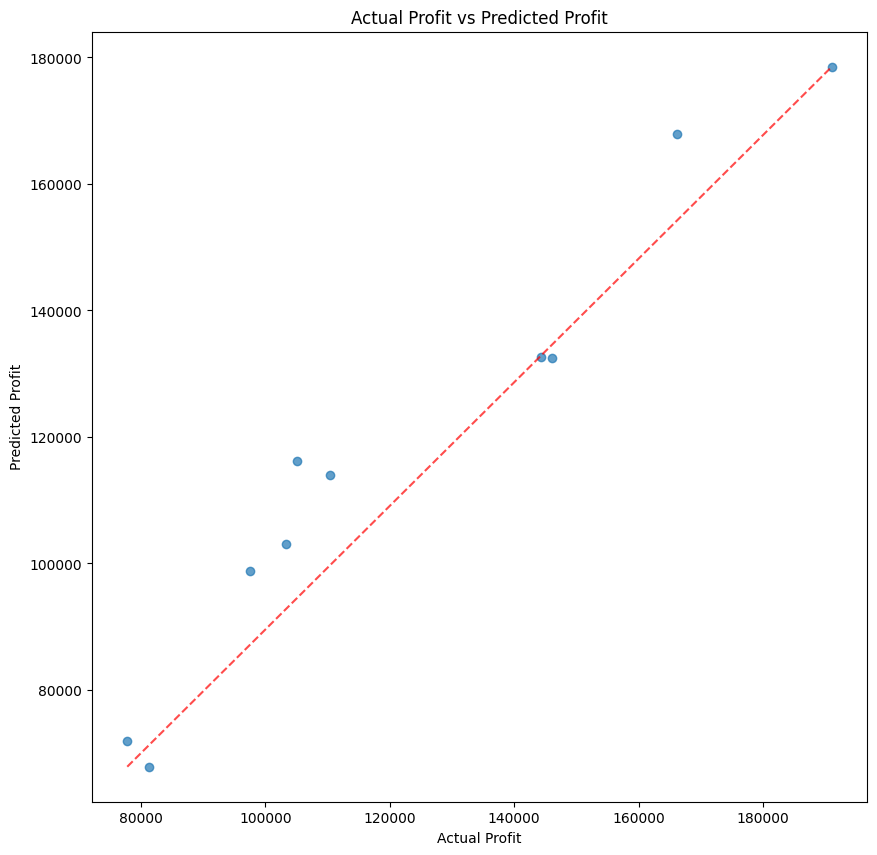

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred,alpha=0.7)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual Profit vs Predicted Profit')

plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red',alpha=0.7,linestyle='--')
plt.show()